This demo describes a process of a programmable model building using models of basic biological gates defined in `models_evol.py`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import models
from parameters import *

# Building a model
An example of model with 5 variables (species) -- A, B, X, Y, Z. A and B are external inputs that are not modified in the models. They activate the expression of X and Y, respectively. X and Y regulated the expression of Z in a manner of logical AND function

In [2]:
def my_model(T, state, *params):
    A, B, X, Y, Z = state
    alpha, Kd, n, delta = params
    
    dA = 0
    dB = 0
    
    dX = models.YES(A, (alpha, Kd, n)) + models.degrade(X, delta) 
    dY = models.YES(B, (alpha, Kd, n)) + models.degrade(Y, delta) 
    
    dZ = models.AND11(A, B, (alpha, Kd, n)) + models.degrade(Z, delta) 
    
    return [dA, dB, dX, dY, dZ]    

# Testing the model

### Setting the parameters

In [3]:
# simulation and model parameters

# duration of simulation
t_end = 100

# kinetic rates
alpha = 10
Kd = 1
n = 2
delta = 1

### Running the simulation and plotting the results

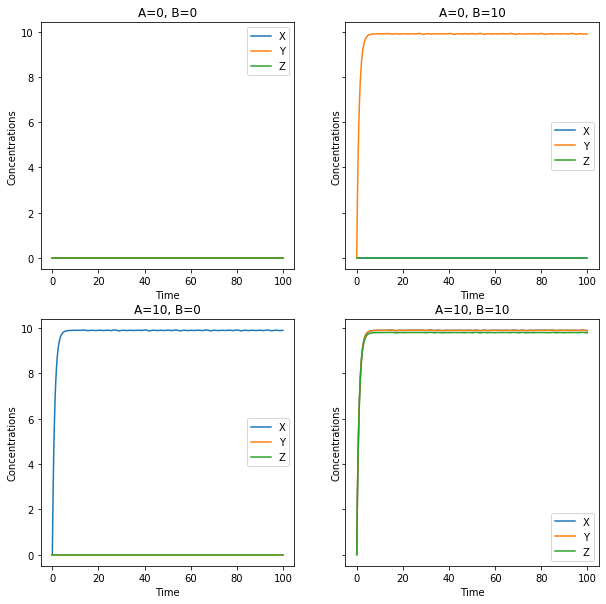

In [4]:
# set model parameters
params = alpha, Kd, n, delta

# set simulation parameters
N = t_end*10 # number of samples
T = np.linspace(0, t_end, N)


# we sill simulate the model for four different input combinations 
inputs = [(0,0), 
          (0,10), 
          (10,0), 
          (10,10)]
# we will plot the results in four subplots
f, axs = plt.subplots(2, 2, sharey=True)

for ax, ins in zip(axs.flat, inputs):
    # set initial conditions
    Y0 = np.zeros(5) 
    Y0[0] = ins[0] # set A 
    Y0[1] = ins[1] # set B
    
    # solving the initial value problems with scipy
    sol = solve_ivp(my_model, [0, t_end], Y0, args=params, dense_output=True)
    z = sol.sol(T)

    ax.plot(T, z.T[:,2:])
    ax.legend(['X','Y','Z'])
    ax.set_xlabel('Time')
    ax.set_ylabel('Concentrations')  
    ax.set_title(f"A={ins[0]}, B={ins[1]}")
    
f.set_size_inches(10,10)
plt.show()
